In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join

# functions

In [69]:
def getSRMData(datadir:str)-> dict:
	'''
	Get all files from a the directory concerning SRM.
	'''
	posData = []
	negData = []
	allData = []

	fileNames = []

	for f in listdir(datadir):
		if isfile(join(datadir, f)):	
				fileNames.append(join(datadir, f))
			
	for file in fileNames:
		allData.append(pd.read_excel(file))

	#if condition is true it gets sorted in the second dataframe
	for table in allData:
			posTable = table[table['PRODUCT'].str.contains('POS')]
			negTable = table[table['PRODUCT'].str.contains('NEG')]
			posData.append(posTable)
			negData.append(negTable)


	data = {'allData': allData,
		 	'posData': posData,
			'negData': negData}

	return data

In [70]:
def skalierungsfaktor_finden(df, x):
    df = df.copy()
    df.index = pd.date_range(start='2020-01-06', periods=len(df), freq='4H')  # Montag, 4h Schritte
    
    low, high = 0.5, 1.5  # Startwerte für die Skalierung
    tol = 0.001  # Toleranz
    while high - low > tol:
        mid = (low + high) / 2
        angepasster_durchschnitt = df.iloc[:, -1].values.reshape(-1, 1) * mid  # Anpassung der Form
        anteil = (df.iloc[:, :-1].values < angepasster_durchschnitt).mean()
        
        if anteil < x / 100:
            low = mid
        else:
            high = mid
    
    return mid

In [97]:
def testPercentage(data:pd.DataFrame, meanData:pd.DataFrame, length:int) -> float:
	'''
	scales the data and calculates acceptance percentage
	'''
	higher = 0
	lower = 0

	dataColumns = data.columns
	
	for x in range(0, length):
		meanValue = meanData[x]

		for col in dataColumns:
			currentValue = data[col][x]
			if currentValue < meanValue:
				lower += 1
			else: 
				higher += 1

	acceptance = round(higher / (higher + lower), 4)

	print(f'lower: {lower} \t higher: {higher} \t acceptance %: {acceptance}')

	return acceptance

In [95]:
def generateProbsRL(data, name):
	#generate baseData	
	meanData = pd.Series()
	meanData = data.mean(axis=1)
	dataLength = data[data.columns[0]].shape[0]
	
	#generate saveframes
	probData = pd.DataFrame()
	scaledData = pd.DataFrame()


	for x in range(0, 51):
		currentScalingFactor = round(x * 0.1, 1)
		scaledMeanData = scaleSeries(meanData, currentScalingFactor)
		percentage = testPercentage(data, scaledMeanData, dataLength)
		percData = np.full(dataLength, percentage)
		scaledData[f's{x}'] = scaledMeanData
		probData[f's{x}'] = percData

	#ad one row as escape to do no bid
	noBidValues = np.full(dataLength, 0)
	noBidPerc = np.full(dataLength, 0)

	scaledData[f's51'] = noBidValues
	probData[f's51'] = noBidPerc

	#generate indexes
	scaledData.index = [f"b{i}" for i in range(len(scaledData))]
	probData.index = [f"b{i}" for i in range(len(probData))]

	#generate names
	probDataName = f'{name}_scenarioPerc'
	scaledDataName = f'{name}_scenarioValues'

	#save data
	probData.to_excel(f'./data/forecast/{probDataName}.xlsx')
	scaledData.to_excel(f'./data/forecast/{scaledDataName}.xlsx')

In [ ]:
def generateProbsDA(data, name):
	#generate baseData	
	meanData = pd.Series()
	meanData = data.mean(axis=1)
	dataLength = data[data.columns[0]].shape[0]
	
	#generate saveframes
	probData = pd.DataFrame()
	scaledData = pd.DataFrame()


	for x in range(0, 51):
		currentScalingFactor = round(x * 0.1, 1)
		scaledMeanData = scaleSeries(meanData, currentScalingFactor)
		percentage = testPercentage(data, scaledMeanData, dataLength)
		percData = np.full(dataLength, percentage)
		scaledData[f's{x}'] = scaledMeanData
		probData[f's{x}'] = percData

	#ad one row as escape to do no bid
	noBidValues = np.full(dataLength, 0)
	noBidPerc = np.full(dataLength, 0)

	scaledData[f's51'] = noBidValues
	probData[f's51'] = noBidPerc

	#generate indexes
	scaledData.index = [f"h{i}" for i in range(len(scaledData))]
	probData.index = [f"h{i}" for i in range(len(probData))]

	#generate names
	probDataName = f'{name}_scenarioPerc'
	scaledDataName = f'{name}_scenarioValues'

	#save data
	probData.to_excel(f'./data/forecast/{probDataName}.xlsx')
	scaledData.to_excel(f'./data/forecast/{scaledDataName}.xlsx')

In [ ]:
def generateProbsRA(data, name):
	#generate baseData	
	meanData = pd.Series()
	meanData = data.mean(axis=1)
	dataLength = data[data.columns[0]].shape[0]
	
	#generate saveframes
	probData = pd.DataFrame()
	scaledData = pd.DataFrame()


	for x in range(0, 51):
		currentScalingFactor = round(x * 0.1, 1)
		scaledMeanData = scaleSeries(meanData, currentScalingFactor)
		percentage = testPercentage(data, scaledMeanData, dataLength)
		percData = np.full(dataLength, percentage)
		scaledData[f's{x}'] = scaledMeanData
		probData[f's{x}'] = percData

	#ad one row as escape to do no bid
	noBidValues = np.full(dataLength, 0)
	noBidPerc = np.full(dataLength, 0)

	scaledData[f's51'] = noBidValues
	probData[f's51'] = noBidPerc

	#generate indexes
	scaledData.index = [f"q{i}" for i in range(len(scaledData))]
	probData.index = [f"q{i}" for i in range(len(probData))]

	#generate names
	probDataName = f'{name}_scenarioPerc'
	scaledDataName = f'{name}_scenarioValues'

	print(f"probData: \t {probData.shape}")
	#save data
	probData.to_excel(f'./data/forecast/{probDataName}.xlsx')
	scaledData.to_excel(f'./data/forecast/{scaledDataName}.xlsx')

#### this is important for negative numbers


Cause we want to have every number to be reduced when scaling by 10%.
But if we simply multiply -10 with 10% it actually gets bigger

In [82]:
def scaleSeries(dataSeries, factor):
	series = []
	for x in range(0, len(dataSeries)):
		scaledValue = dataSeries[x] + (abs(dataSeries[x]) * (factor - 1))
		series.append(scaledValue)

	scaledSeries = pd.Series(data=series)

	return scaledSeries


In [ ]:
def generateProbsDA(data, name):
	#generate baseData	
	meanData = pd.Series()
	meanData = data.mean(axis=1)
	dataLength = data[data.columns[0]].shape[0]
	
	#generate saveframes
	probData = pd.DataFrame()
	scaledData = pd.DataFrame()


	for x in range(0, 51):
		currentScalingFactor = round(x * 0.1, 1)
		scaledMeanData = scaleSeries(meanData, currentScalingFactor)
		percentage = testPercentage(data, scaledMeanData, dataLength)
		percData = np.full(dataLength, percentage)
		scaledData[f's{x}'] = scaledMeanData
		probData[f's{x}'] = percData

	#ad one row as escape to do no bid
	noBidValues = np.full(dataLength, 0)
	noBidPerc = np.full(dataLength, 0)

	scaledData[f's51'] = noBidValues
	probData[f's51'] = noBidPerc

	#generate indexes
	scaledData.index = [f"q{i}" for i in range(len(scaledData))]
	probData.index = [f"q{i}" for i in range(len(probData))]

	#generate names
	probDataName = f'{name}_scenarioPerc'
	scaledDataName = f'{name}_scenarioValues'

	print(f"probData: \t {probData.shape}")
	#save data
	probData.to_excel(f'./data/forecast/{probDataName}.xlsx')
	scaledData.to_excel(f'./data/forecast/{scaledDataName}.xlsx')

In [77]:
def remove_repetitions(df: pd.DataFrame) -> pd.DataFrame:
    """
    Entfernt wiederholte Werte in einem DataFrame, wenn sich jeder Wert 4-mal wiederholt.
    Beibehaltung nur jeder vierten Zeile.
    """
    return df.iloc[::4].reset_index(drop=True)

# generate forecasts


### capacity data

In [78]:
originalCatData = getSRMData('./originData/capacityData/') 

margPosCapPrices = pd.DataFrame()
margNegCapPrices = pd.DataFrame()

#resctrict data to full weeks
margPosCapPrices['posCap - 2020'] = originalCatData['posData'][0]['TOTAL_MARGINAL_CAPACITY_PRICE_[EUR/MW]'][30:2172]
print(margPosCapPrices['posCap - 2020'].shape)

margPosCapPrices['posCap - 2021'] = originalCatData['posData'][1]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][18:2160]
print(margPosCapPrices['posCap - 2021'].shape)

margPosCapPrices['posCap - 2022'] = originalCatData['posData'][2]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][12:2154]
print(margPosCapPrices['posCap - 2022'].shape)

margPosCapPrices['posCap - 2023'] = originalCatData['posData'][3]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][6:2190]
print(margPosCapPrices['posCap - 2023'].shape)

margPosCapPrices['posCap - 2024'] = originalCatData['posData'][4]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][0:2178]
print(margPosCapPrices['posCap - 2024'].shape)

margPosCapPrices = margPosCapPrices.reset_index(drop=True)

#resctrict data to full weeks
margNegCapPrices['negCap - 2020'] = originalCatData['negData'][0]['TOTAL_MARGINAL_CAPACITY_PRICE_[EUR/MW]'][30:2172]
margNegCapPrices['negCap - 2021'] = originalCatData['negData'][1]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][18:2160]
margNegCapPrices['negCap - 2022'] = originalCatData['negData'][2]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][12:2154]
margNegCapPrices['negCap - 2023'] = originalCatData['negData'][3]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][6:2190]
margNegCapPrices['negCap - 2024'] = originalCatData['negData'][4]['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][0:2178]
margNegCapPrices = margNegCapPrices.reset_index(drop=True)

c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contain

(2142,)
(2142,)
(2142,)
(2142,)
(2142,)


#### generate scenario data

In [98]:
generateProbsRL(margPosCapPrices, 'posCap')
generateProbsRL(margNegCapPrices, 'negCap')

lower: 0 	 higher: 10710 	 acceptance %: 1.0
lower: 474 	 higher: 10236 	 acceptance %: 0.9557
lower: 758 	 higher: 9952 	 acceptance %: 0.9292
lower: 1145 	 higher: 9565 	 acceptance %: 0.8931
lower: 1762 	 higher: 8948 	 acceptance %: 0.8355
lower: 2478 	 higher: 8232 	 acceptance %: 0.7686
lower: 3267 	 higher: 7443 	 acceptance %: 0.695
lower: 4132 	 higher: 6578 	 acceptance %: 0.6142
lower: 4958 	 higher: 5752 	 acceptance %: 0.5371
lower: 5688 	 higher: 5022 	 acceptance %: 0.4689
lower: 6388 	 higher: 4322 	 acceptance %: 0.4035
lower: 7026 	 higher: 3684 	 acceptance %: 0.344
lower: 7565 	 higher: 3145 	 acceptance %: 0.2937
lower: 8038 	 higher: 2672 	 acceptance %: 0.2495
lower: 8448 	 higher: 2262 	 acceptance %: 0.2112
lower: 8777 	 higher: 1933 	 acceptance %: 0.1805
lower: 9058 	 higher: 1652 	 acceptance %: 0.1542
lower: 9311 	 higher: 1399 	 acceptance %: 0.1306
lower: 9482 	 higher: 1228 	 acceptance %: 0.1147
lower: 9671 	 higher: 1039 	 acceptance %: 0.097
lower: 97

### energy data

#### with marginal data

##### get data

In [ ]:
originalEnData = getSRMData('./originData/EnergyData/') 

margPosEnPrices = pd.DataFrame()
margNegEnPrices = pd.DataFrame()

dayLength = 96
yearLength = dayLength * 365
weekStart = []
weekStart.append(1*dayLength)
weekStart.append(0*dayLength)
 
weekEnd = []
weekEnd.append(yearLength - (0*dayLength))
weekEnd.append(yearLength - (2*dayLength))

#resctrict data to full weeks
margPosEnPrices['PosEn - 2023'] = originalEnData['posData'][0]['GERMANY_MARGINAL_ENERGY_PRICE_[EUR/MWh]'][weekStart[0]:weekEnd[0]]
margPosEnPrices['PosEn - 2024'] = originalEnData['posData'][1]['GERMANY_MARGINAL_ENERGY_PRICE_[EUR/MWh]'][weekStart[1]:weekEnd[1]]
margPosEnPrices = margPosEnPrices.reset_index(drop=True)

#resctrict data to full weeks
margNegEnPrices['NegEn - 2023'] = originalEnData['negData'][0]['GERMANY_MARGINAL_ENERGY_PRICE_[EUR/MWh]'][weekStart[0]:weekEnd[0]] * (-1)
margNegEnPrices['NegEn - 2024'] = originalEnData['negData'][1]['GERMANY_MARGINAL_ENERGY_PRICE_[EUR/MWh]'][weekStart[1]:weekEnd[1]] * (-1)
margNegEnPrices = margNegEnPrices.reset_index(drop=True)

c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### generate scenario data

In [ ]:
generateProbsRA(margPosEnPrices, 'posEnMarginal')
generateProbsRA(margNegEnPrices, 'negEnMarginal')

lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 2662 	 higher: 67226 	 acceptance %: 0.9619
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035
lower: 69640 	 higher: 248 	 acceptance %: 0.0035

##### show data

In [ ]:
print(margPosEnPrices.shape)
print(margNegEnPrices.shape)

(34944, 2)
(34944, 2)


In [ ]:
meanNegEn = margNegEnPrices.mean(axis=1)
meanPosEn = margPosEnPrices.mean(axis=1)

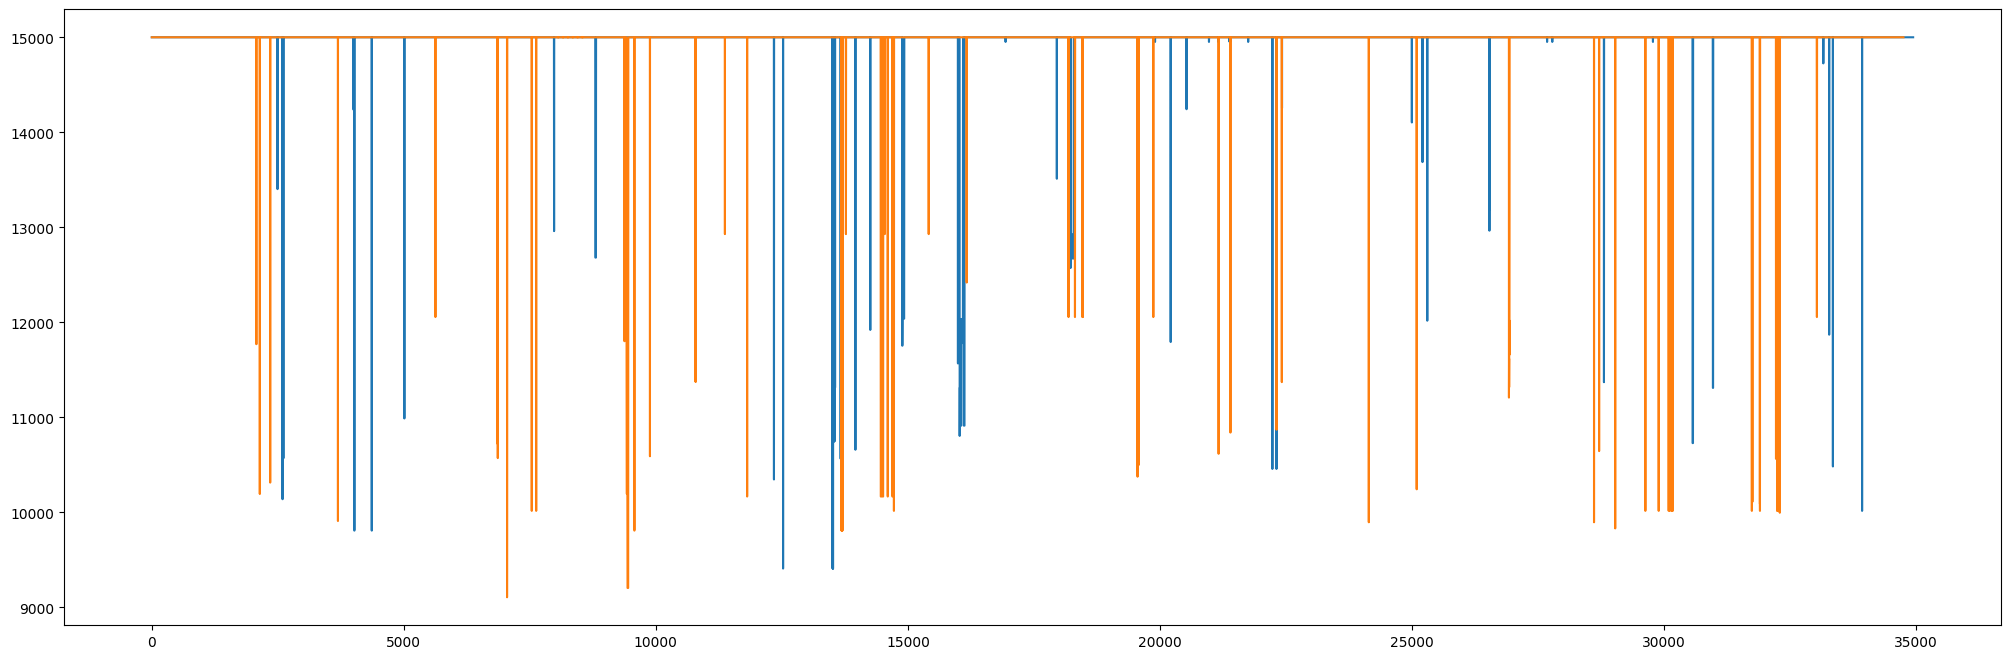

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(margNegEnPrices['NegEn - 2023'])
plt.plot(margNegEnPrices['NegEn - 2024'])

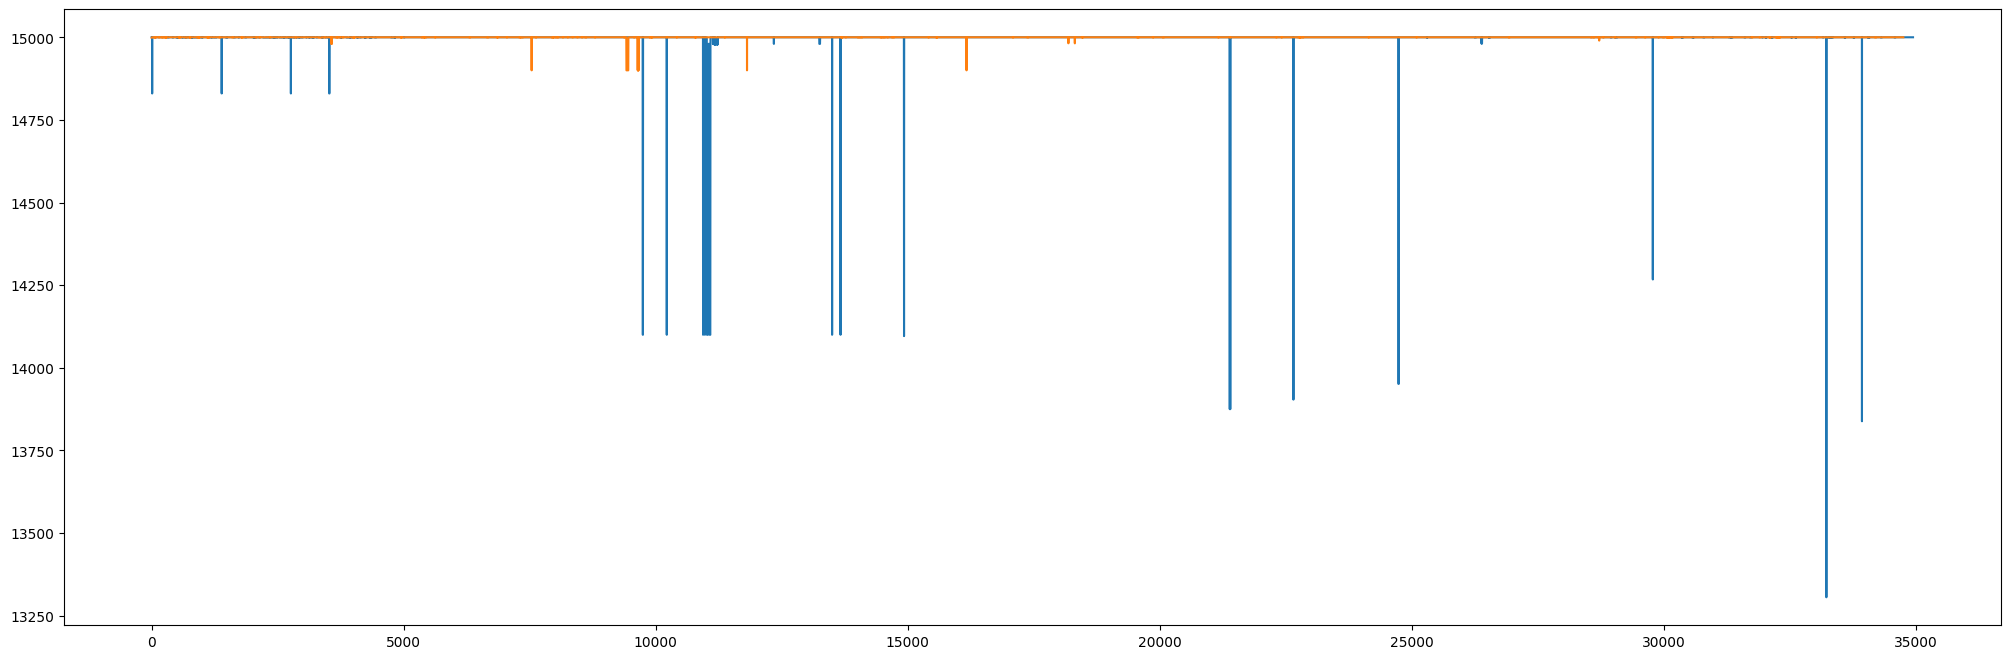

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(margPosEnPrices['PosEn - 2023'])
plt.plot(margPosEnPrices['PosEn - 2024'])

#### with average data

##### get the data

In [ ]:
originalEnData = getSRMData('./originData/EnergyData/') 

margPosEnPrices = pd.DataFrame()
margNegEnPrices = pd.DataFrame()

dayLength = 96
yearLength = dayLength * 365
weekStart = []
weekStart.append(1*dayLength)
weekStart.append(0*dayLength)
 
weekEnd = []
weekEnd.append(yearLength - (0*dayLength))
weekEnd.append(yearLength - (2*dayLength))

#resctrict data to full weeks
margPosEnPrices['PosEn - 2023'] = originalEnData['posData'][0]['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'][weekStart[0]:weekEnd[0]]
margPosEnPrices['PosEn - 2024'] = originalEnData['posData'][1]['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'][weekStart[1]:weekEnd[1]]
margPosEnPrices = margPosEnPrices.reset_index(drop=True)

#resctrict data to full weeks
margNegEnPrices['NegEn - 2023'] = originalEnData['negData'][0]['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'][weekStart[0]:weekEnd[0]] * (-1)
margNegEnPrices['NegEn - 2024'] = originalEnData['negData'][1]['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'][weekStart[1]:weekEnd[1]] * (-1)
margNegEnPrices = margNegEnPrices.reset_index(drop=True)

c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sebas\Documents\CloudDrive\Uni\WS24\Research Project\gams\python\.wvenv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### generate scenario data

In [ ]:
generateProbsRA(margPosEnPrices, 'posEnAverage')
generateProbsRA(margNegEnPrices, 'negEnAverage')

lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 0 	 higher: 69888 	 acceptance %: 1.0
lower: 16 	 higher: 69872 	 acceptance %: 0.9998
lower: 157 	 higher: 69731 	 acceptance %: 0.9978
lower: 871 	 higher: 69017 	 acceptance %: 0.9875
lower: 2502 	 higher: 67386 	 acceptance %: 0.9642
lower: 5406 	 higher: 64482 	 acceptance %: 0.9226
lower: 9995 	 higher: 59893 	 acceptance %: 0.857
lower: 16316 	 higher: 53572 	 acceptance %: 0.7665
lower: 24905 	 higher: 44983 	 acceptance %: 0.6436
lower: 34696 	 higher: 35192 	 acceptance %: 0.5035
lower: 44735 	 higher: 25153 	 acceptance %: 0.3599
lower: 53324 	 higher: 16564 	 acceptance %: 0.237
lower: 59645 	 higher: 10243 	 acceptance %: 0.1466
lower: 64234 	 higher: 5654 	 acceptance %: 0.0809
lower: 67136 	 higher: 2752 	 acceptance %: 0.0394
lower: 68769 	 higher: 1119 	 acceptance %: 0.016
lower: 69483 	 higher: 405 	 acceptance %: 0.0058
lower: 69624 	 higher: 264 	 acceptance %: 0.0038
lower: 69640 	 higher: 248 	 acceptance %: 0.0

##### show data

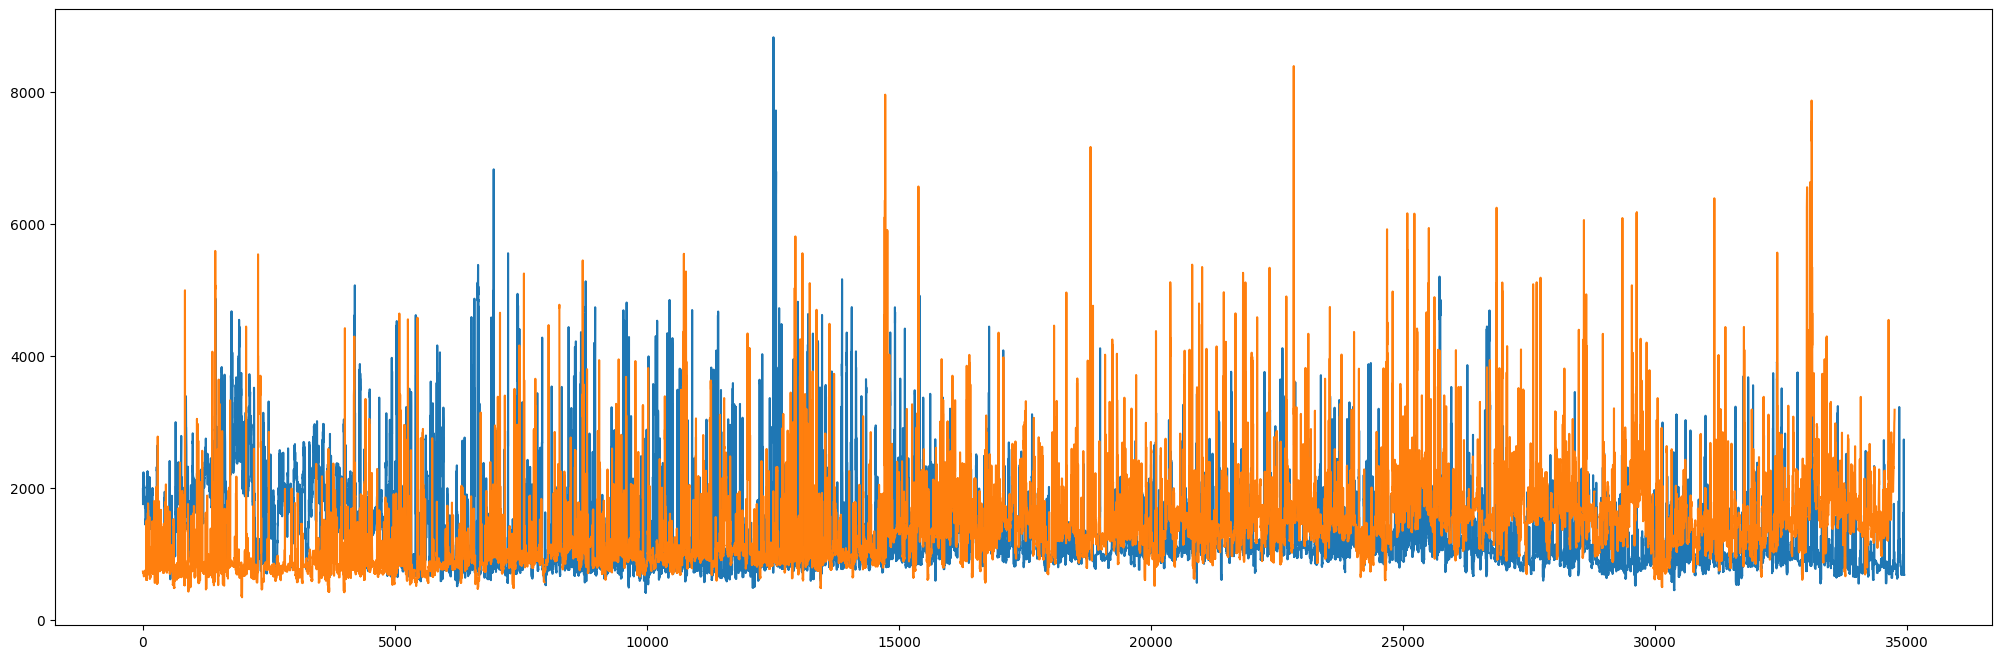

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(margPosEnPrices['PosEn - 2023'])
plt.plot(margPosEnPrices['PosEn - 2024'])

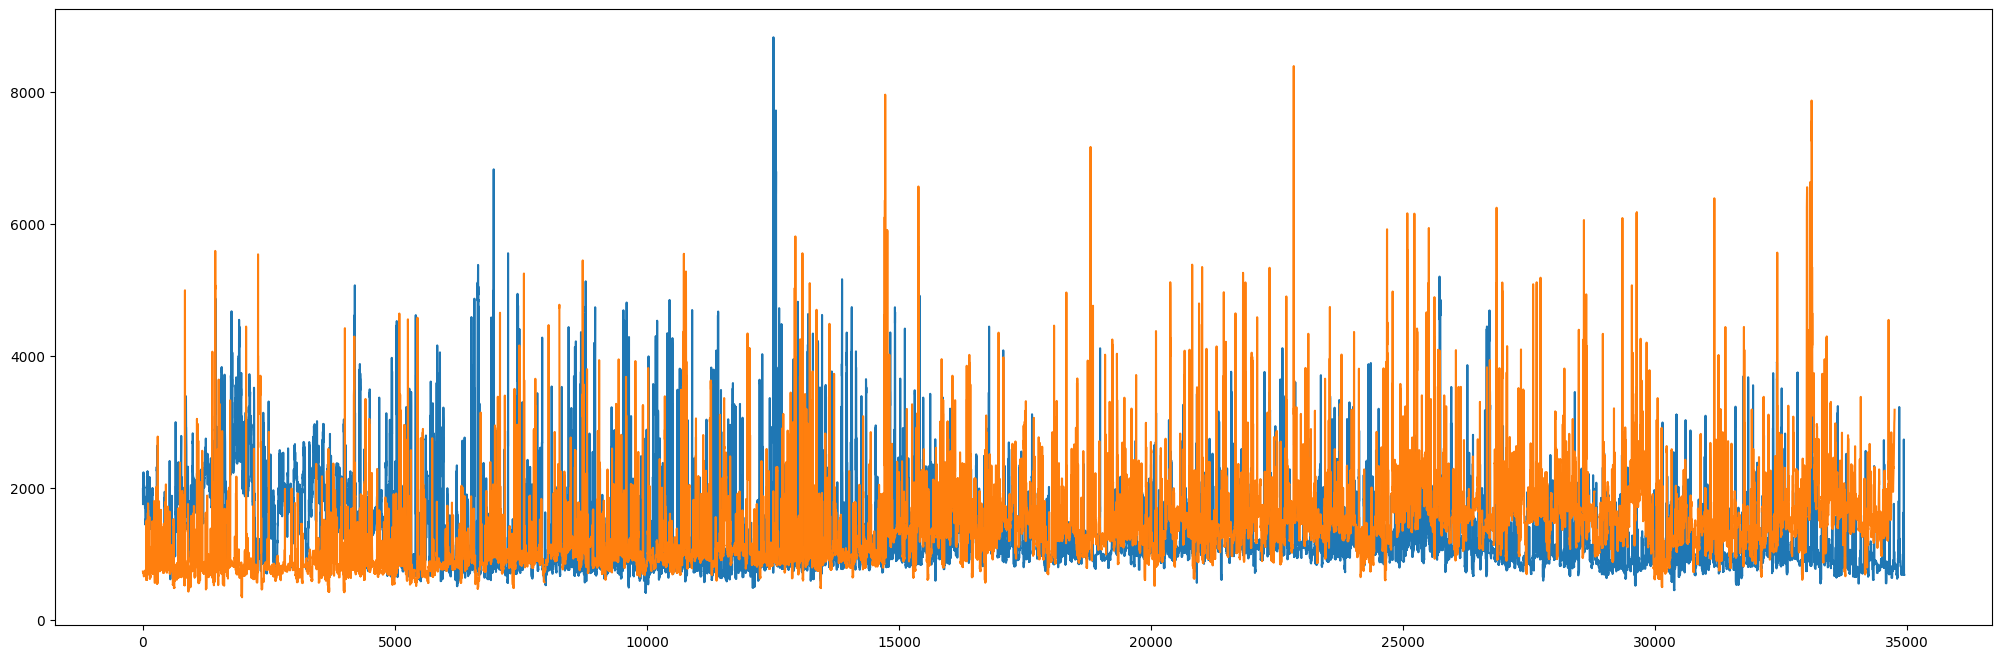

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(margPosEnPrices['PosEn - 2023'])
plt.plot(margPosEnPrices['PosEn - 2024'])

### da prices

##### get data


In [ ]:
da_prices2020 = remove_repetitions(pd.read_excel('./originData/daData/da_prices2020.xlsx', sheet_name='Sheet1', header=None))
da_prices2021 = remove_repetitions(pd.read_excel('./originData/daData/da_prices2021.xlsx', sheet_name='Sheet1', header=None))
da_prices2022 = remove_repetitions(pd.read_excel('./originData/daData/da_prices2022.xlsx', sheet_name='Sheet1', header=None))
da_prices2023 = remove_repetitions(pd.read_excel('./originData/daData/da_prices2023.xlsx', sheet_name='Sheet1', header=None))
da_prices2024 = remove_repetitions(pd.read_excel('./originData/daData/da_prices2024.xlsx', sheet_name='Sheet1', header=None))

reset indexes after removing repetitions

In [ ]:
da_prices2020 = da_prices2020.reset_index(drop=True)
da_prices2021 = da_prices2021.reset_index(drop=True)
da_prices2022 = da_prices2022.reset_index(drop=True)
da_prices2023 = da_prices2023.reset_index(drop=True)
da_prices2024 = da_prices2024.reset_index(drop=True)

In [ ]:
dayUnits = 24

yearStart = []
yearStart.append(dayUnits * 5)
yearStart.append(dayUnits * 3)
yearStart.append(dayUnits * 2)
yearStart.append(dayUnits * 1)
yearStart.append(dayUnits * 0)

da_prices2020 = da_prices2020[yearStart[0]:]
da_prices2021 = da_prices2021[yearStart[1]:]
da_prices2022 = da_prices2022[yearStart[2]:]
da_prices2023 = da_prices2023[yearStart[3]:]
da_prices2024 = da_prices2024[yearStart[4]:]



In [ ]:
yearUnits = dayUnits * 7 * 51
yearEnd = []
yearEnd.append(yearUnits - (dayUnits * 3))
yearEnd.append(yearUnits - (dayUnits * 5))
yearEnd.append(yearUnits - (dayUnits * 6))
yearEnd.append(yearUnits - (dayUnits * 7))
yearEnd.append(yearUnits - (dayUnits * 8))

da_prices2020 = da_prices2020[:yearUnits]
da_prices2021 = da_prices2021[:yearUnits]
da_prices2022 = da_prices2022[:yearUnits]
da_prices2023 = da_prices2023[:yearUnits]
da_prices2024 = da_prices2024[:yearUnits]

da_prices2020 = da_prices2020.reset_index(drop=True)
da_prices2021 = da_prices2021.reset_index(drop=True)
da_prices2022 = da_prices2022.reset_index(drop=True)
da_prices2023 = da_prices2023.reset_index(drop=True)
da_prices2024 = da_prices2024.reset_index(drop=True)

In [ ]:
da_prices = pd.DataFrame()
da_prices['da_prices2020'] = da_prices2020
da_prices['da_prices2021'] = da_prices2021
da_prices['da_prices2022'] = da_prices2022
da_prices['da_prices2023'] = da_prices2023
da_prices['da_prices2024'] = da_prices2024

generateProbsDA(da_prices, 'da_prices')

KeyError: 0

# Basic data analysis

C:\Users\sebas\AppData\Local\Temp\ipykernel_3660\1568187723.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(margPosCapPrices['posCap - 2020'][0:2142], label=f'posCap - 2020 - {col_means[0]}')
C:\Users\sebas\AppData\Local\Temp\ipykernel_3660\1568187723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(margPosCapPrices['posCap - 2021'][0:2142], label=f'posCap - 2021 - {col_means[1]}')
C:\Users\sebas\AppData\Local\Temp\ipykernel_3660\1568187723.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

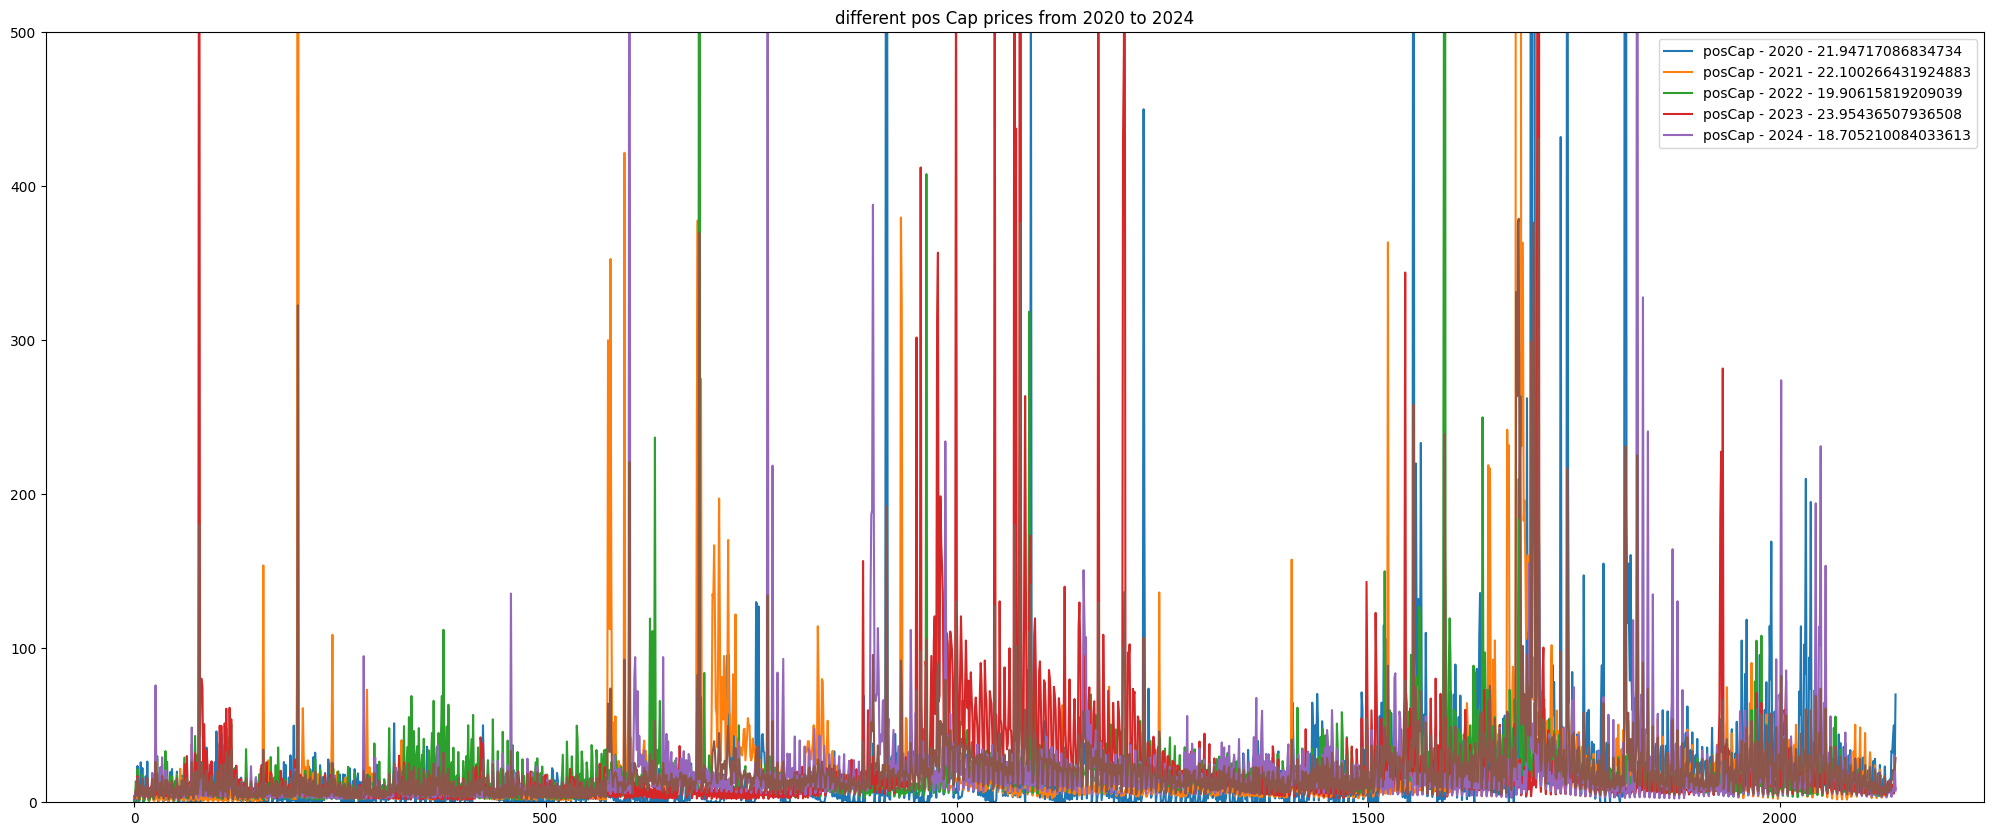

In [ ]:

plt.figure(figsize=(25,10))
plt.ylim([0,500])
col_means = margPosCapPrices.mean(axis=0)
plt.title('different pos Cap prices from 2020 to 2024')
plt.plot(margPosCapPrices['posCap - 2020'][0:2142], label=f'posCap - 2020 - {col_means[0]}')
plt.plot(margPosCapPrices['posCap - 2021'][0:2142], label=f'posCap - 2021 - {col_means[1]}')
plt.plot(margPosCapPrices['posCap - 2022'][0:2142], label=f'posCap - 2022 - {col_means[2]}')
plt.plot(margPosCapPrices['posCap - 2023'][0:2142], label=f'posCap - 2023 - {col_means[3]}')
plt.plot(margPosCapPrices['posCap - 2024'][0:2142], label=f'posCap - 2024 - {col_means[4]}')
plt.plot(margPosCapPrices.mean(axis=1))
plt.legend()

plt.show()

NameError: name 'meanPosCap' is not defined

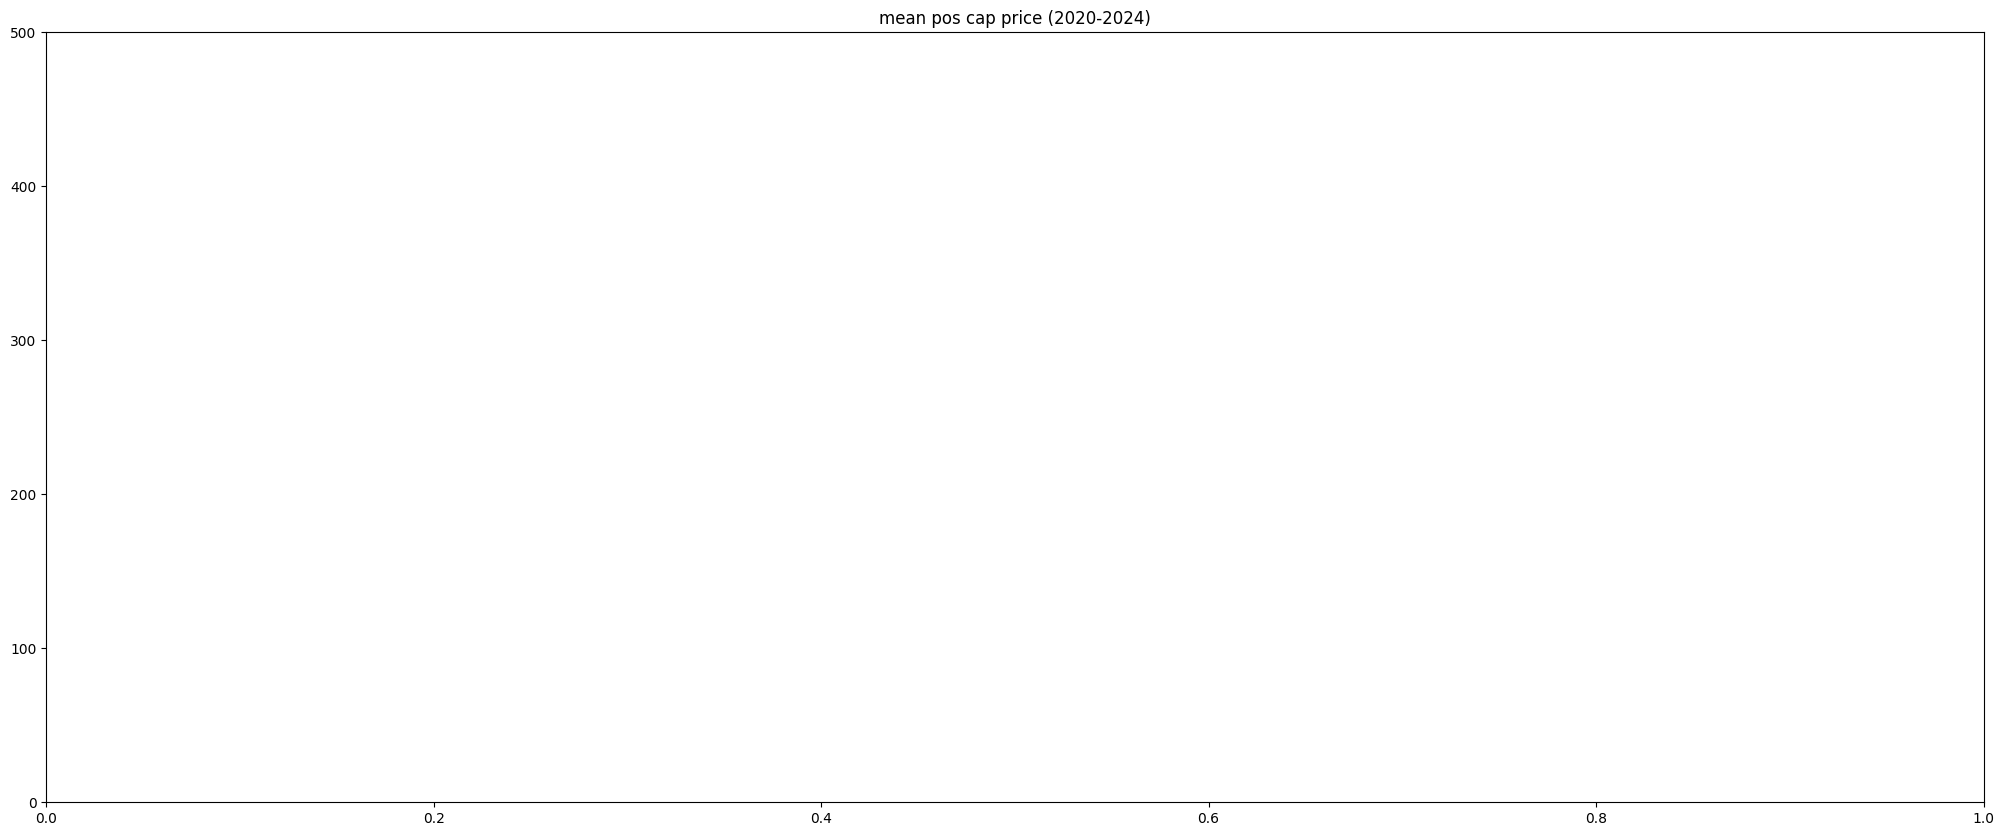

In [ ]:
plt.figure(figsize=(25,10))
plt.title('mean pos cap price (2020-2024)')
plt.ylim([0,500])
plt.plot(meanPosCap['mean'][0:2142])
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(margPosCapPrices['mean'][0:360])
plt.show()